In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
data = pd.read_csv("CREMP_OCTO_Summaries_2023_Density.csv")

# Convert date
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Preview
print(data.head())
print(data.info())

   Year       Date Subregion Habitat  SiteID     Site_name  StationID  \
0  2011 2011-06-08        UK       P      32  Porter Patch        321   
1  2011 2011-06-08        UK       P      32  Porter Patch        322   
2  2011 2011-06-08        UK       P      32  Porter Patch        323   
3  2011 2011-06-08        UK       P      32  Porter Patch        324   
4  2011 2011-06-11        UK       P      33       Admiral        331   

   Eunicea_calyculata  Gorgonia_ventalina  Pseudopterogorgia_americana  \
0                 0.0                 0.9                          6.3   
1                 0.1                 0.3                          5.9   
2                 0.4                 0.4                          4.4   
3                 0.5                 0.6                          6.1   
4                 0.0                 1.7                          0.3   

   Pseudopterogorgia_bipinnata  Eunicea_flexuosa  Pseudoplexaura_porosa  \
0                          NaN           

C:\Users\yunus\AppData\Local\Temp\ipykernel_8452\2326943353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_presence.index, y=species_presence.values, palette="viridis")


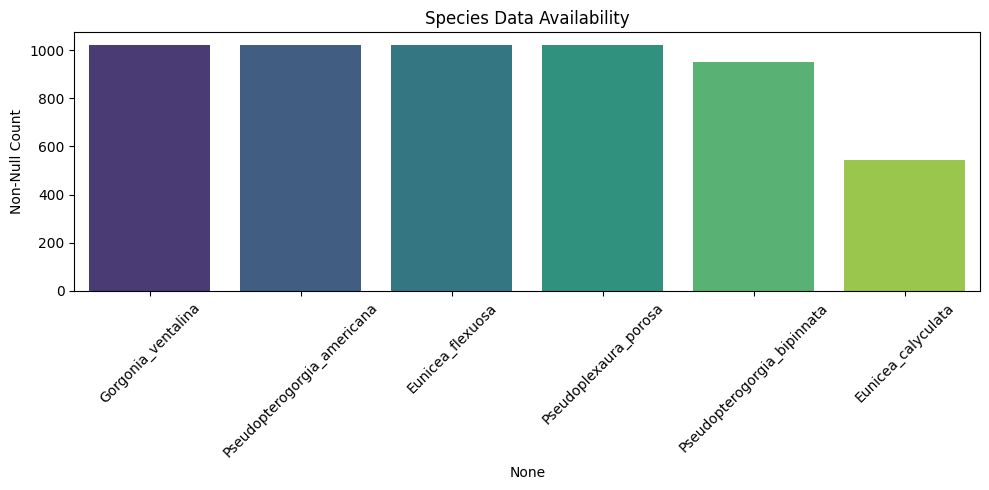

In [24]:
# ------------------------
# 🔍 1. Species Presence Overview
# ------------------------
species_cols = data.columns[7:-1]  # skip metadata, exclude 'Total_Octocorals'
species_presence = data[species_cols].notna().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=species_presence.index, y=species_presence.values, palette="viridis")
plt.title("Species Data Availability")
plt.ylabel("Non-Null Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

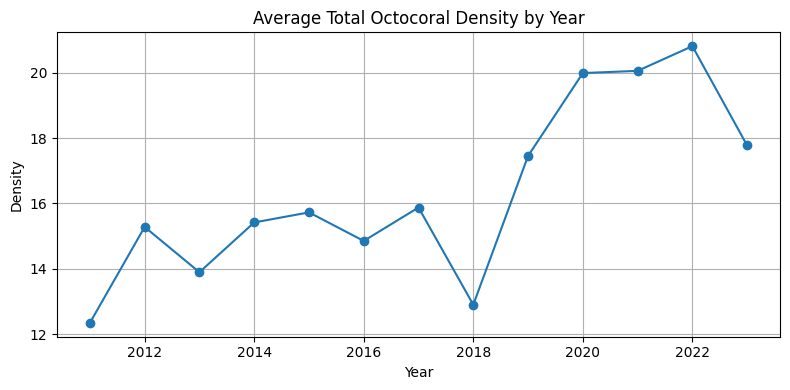

C:\Users\yunus\AppData\Local\Temp\ipykernel_8452\2536065696.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="Year", y="Total_Octocorals", hue="Subregion", estimator="mean", ci=None)


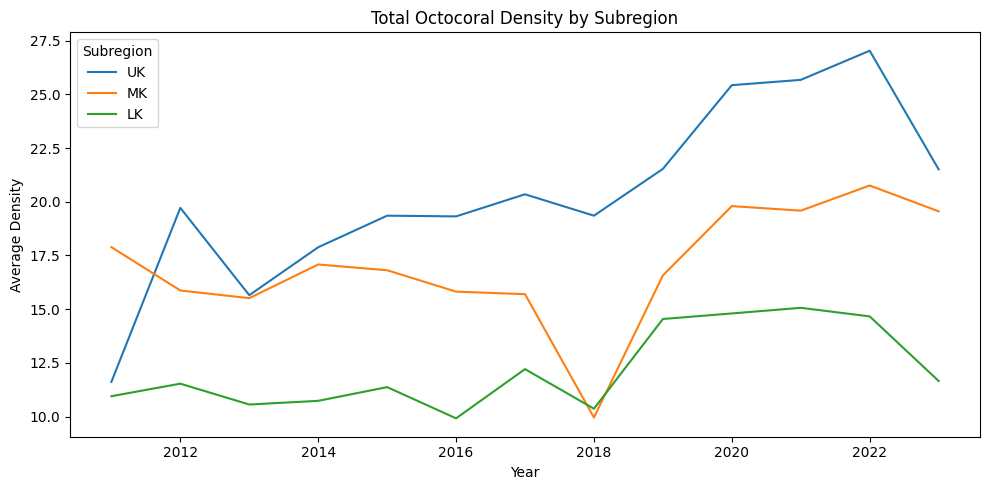

C:\Users\yunus\AppData\Local\Temp\ipykernel_8452\2536065696.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="Year", y="Total_Octocorals", hue="Habitat", estimator="mean", ci=None)


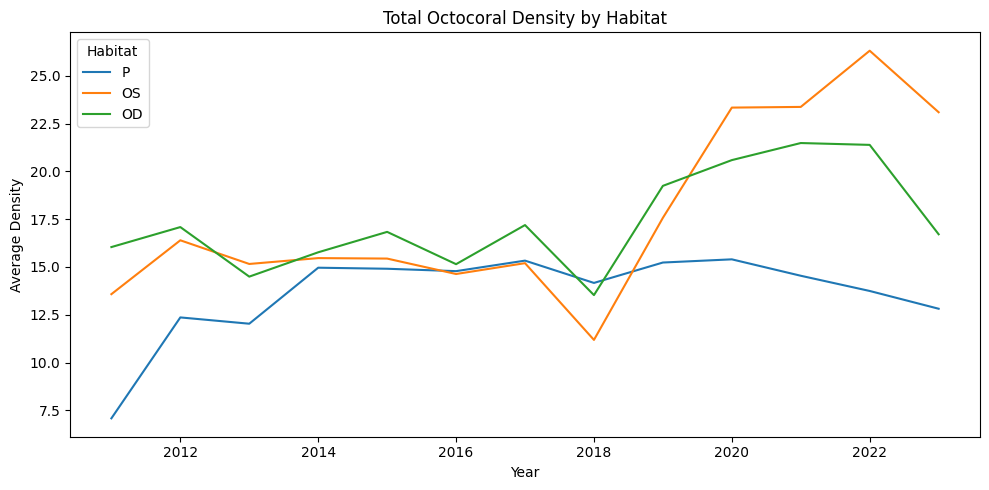

In [8]:
# ------------------------
# 🌊 2. Total Octocoral Density Over Time
# ------------------------
avg_density_by_year = data.groupby("Year")["Total_Octocorals"].mean()

plt.figure(figsize=(8, 4))
avg_density_by_year.plot(marker='o')
plt.title("Average Total Octocoral Density by Year")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# By Subregion
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="Year", y="Total_Octocorals", hue="Subregion", estimator="mean", ci=None)
plt.title("Total Octocoral Density by Subregion")
plt.ylabel("Average Density")
plt.tight_layout()
plt.show()

# By Habitat
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="Year", y="Total_Octocorals", hue="Habitat", estimator="mean", ci=None)
plt.title("Total Octocoral Density by Habitat")
plt.ylabel("Average Density")
plt.tight_layout()
plt.show()

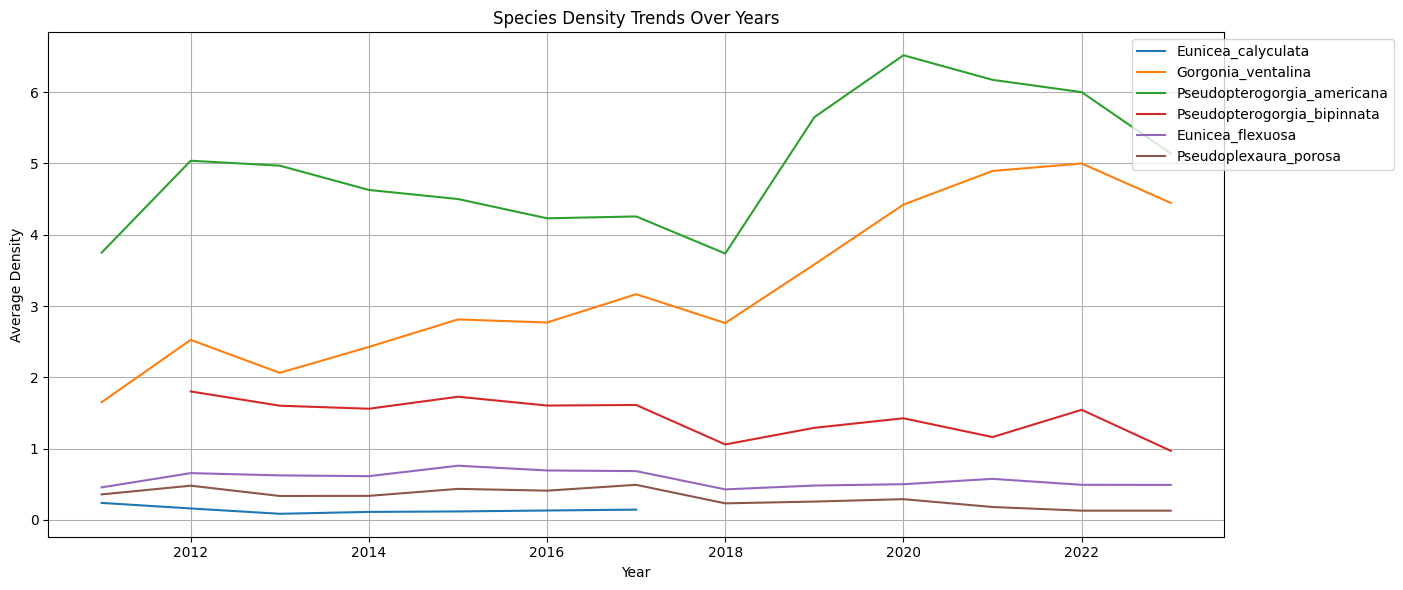

In [10]:
# ------------------------
# 🌿 3. Species-Level Trends Over Time
# ------------------------
species_yearly = data.groupby("Year")[species_cols].mean()

plt.figure(figsize=(14, 6))
for species in species_yearly.columns:
    plt.plot(species_yearly.index, species_yearly[species], label=species)

plt.title("Species Density Trends Over Years")
plt.ylabel("Average Density")
plt.xlabel("Year")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

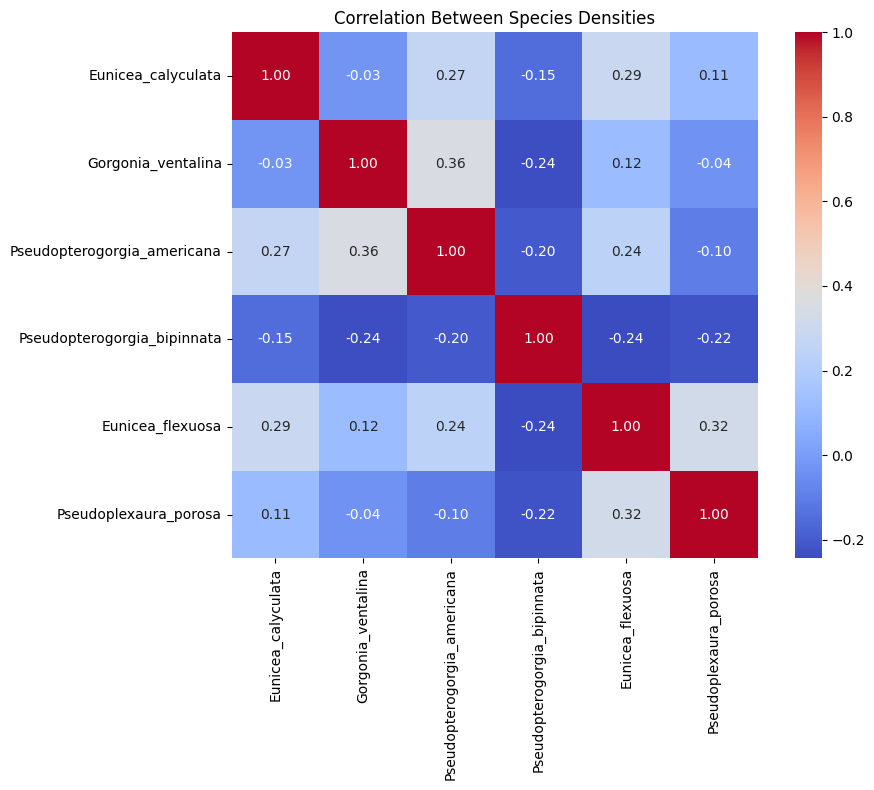

In [12]:
# ------------------------
# 🧪 4. Heatmap of Species Correlations
# ------------------------
corr_matrix = data[species_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Between Species Densities")
plt.tight_layout()
plt.show()

In [16]:
corr_matrix

,Eunicea_calyculata,Gorgonia_ventalina,Pseudopterogorgia_americana,Pseudopterogorgia_bipinnata,Eunicea_flexuosa,Pseudoplexaura_porosa
Eunicea_calyculata,1.000000,-0.029542,0.266736,-0.151297,0.289664,0.112661
Gorgonia_ventalina,-0.029542,1.000000,0.355676,-0.236879,0.119678,-0.036536
Pseudopterogorgia_americana,0.266736,0.355676,1.000000,-0.203613,0.237564,-0.101787
Pseudopterogorgia_bipinnata,-0.151297,-0.236879,-0.203613,1.000000,-0.244348,-0.220919
Eunicea_flexuosa,0.289664,0.119678,0.237564,-0.244348,1.000000,0.320565
Pseudoplexaura_porosa,0.112661,-0.036536,-0.101787,-0.220919,0.320565,1.000000


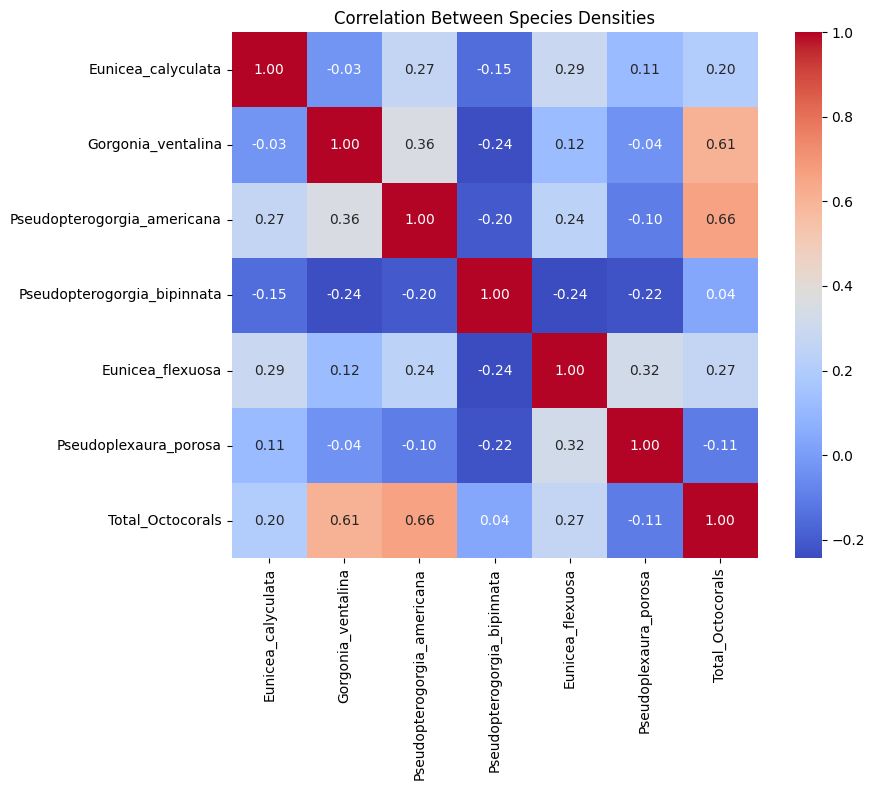

In [28]:
# ------------------------
# 🧪 4. Heatmap of Species Correlations
# ------------------------
species_cols = data.columns[7:14]

corr_matrix = data[species_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Between Species Densities")
plt.tight_layout()
plt.show()

In [30]:
corr_matrix

,Eunicea_calyculata,Gorgonia_ventalina,Pseudopterogorgia_americana,Pseudopterogorgia_bipinnata,Eunicea_flexuosa,Pseudoplexaura_porosa,Total_Octocorals
Eunicea_calyculata,1.000000,-0.029542,0.266736,-0.151297,0.289664,0.112661,0.199314
Gorgonia_ventalina,-0.029542,1.000000,0.355676,-0.236879,0.119678,-0.036536,0.609173
Pseudopterogorgia_americana,0.266736,0.355676,1.000000,-0.203613,0.237564,-0.101787,0.662131
Pseudopterogorgia_bipinnata,-0.151297,-0.236879,-0.203613,1.000000,-0.244348,-0.220919,0.035864
Eunicea_flexuosa,0.289664,0.119678,0.237564,-0.244348,1.000000,0.320565,0.270836
Pseudoplexaura_porosa,0.112661,-0.036536,-0.101787,-0.220919,0.320565,1.000000,-0.107020
Total_Octocorals,0.199314,0.609173,0.662131,0.035864,0.270836,-0.107020,1.000000
